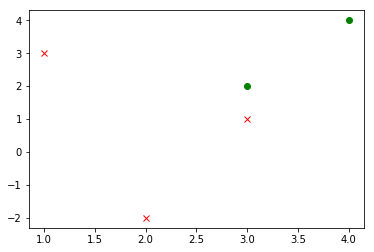

In [5]:
import matplotlib.pyplot as plt
from sklearn import svm
import numpy as np 

#training points and labels
train_points = np.array([[1,3],[3,1],[2,-2],[4,4],[3,2]])
train_labels = np.array([-1,-1,-1,1,1])

#plot the points
pos_train_labels = train_labels == 1
neg_train_labels = train_labels == -1
plt.plot(train_points[pos_train_labels,0],train_points[pos_train_labels,1],'og')
plt.plot(train_points[neg_train_labels,0],train_points[neg_train_labels,1],'xr')
plt.show()

C:\Users\corneliu.dumitru\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


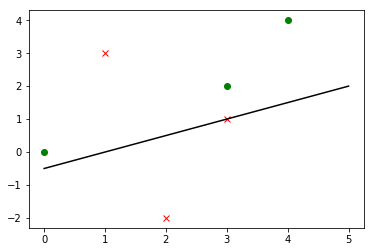

In [37]:
#define the svm classifier
C = 1;
svm_classifier = svm.SVC(C,"linear")
rbf_classifier = svm.SVC(C,"rbf")

#train the model
svm_classifier.fit(train_points,train_labels)
rbf_classifier.fit(train_points, trtain_labels)

#plot the decision boundary = a hyperplane in R^2 = a line given by ax + by + c = 0
#take the coefficients a,b,c from the model
a = svm_classifier.coef_[0,0]
b = svm_classifier.coef_[0,1]
c = svm_classifier.intercept_[0]
#build the line ax + by + c = 0
x = np.linspace(0,5,100)
y = -a/b*x -c/b

#plot the points and the decision boundary
#plot the points
pos_train_labels = train_labels == 1
neg_train_labels = train_labels == -1
plt.plot(train_points[pos_train_labels,0],train_points[pos_train_labels,1],'og')
plt.plot(train_points[neg_train_labels,0],train_points[neg_train_labels,1],'xr')
#plot the decision boundary
plt.plot(x,y,"k")



In [27]:
?svm_classifier
print(svm_classifier.support_)
print(svm_classifier.support_vectors_)
print(svm_classifier.coef_)
print(svm_classifier.intercept_)

[0 1 2 3 4 5]
[[ 1.  3.]
 [ 3.  1.]
 [ 2. -2.]
 [ 4.  4.]
 [ 3.  2.]
 [ 0.  0.]]
[[-0.5  0.5]]
[1.]


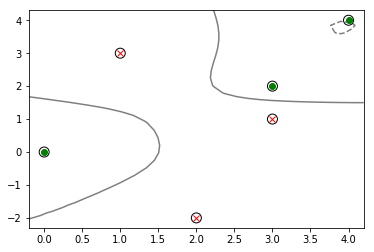

In [38]:
#plot the points
pos_train_labels = train_labels == 1
neg_train_labels = train_labels == -1
plt.plot(train_points[pos_train_labels,0],train_points[pos_train_labels,1],'og')
plt.plot(train_points[neg_train_labels,0],train_points[neg_train_labels,1],'xr')

# plot the decision boundary and the margins
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
#Z = svm_classifier.decision_function(xy).reshape(XX.shape)
Z = rbf_classifier.decision_function(xy).reshape(XX.shape)


# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
#ax.scatter(svm_classifier.support_vectors_[:, 0], svm_classifier.support_vectors_[:, 1], s=100,
#           linewidth=1, facecolors='none', edgecolors='k')
ax.scatter(rbf_classifier.support_vectors_[:, 0], rbf_classifier.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()


In [17]:
#add the point [2,2.1] with label 1 to the initial training set and see what happens to the margin when you vary C
train_points = np.array([[1,3],[3,1],[2,-2],[4,4],[3,2], [2, 2.2]])
train_labels = np.array([-1,-1,-1,1,1,1])

In [36]:
#add the point [0,0] with label 1 to the initial training set and see if you can classify the points. Try the RBF kernel
train_points = np.array([[1,3],[3,1],[2,-2],[4,4],[3,2], [0, 0]])
train_labels = np.array([-1,-1,-1,1,1,1])